In [1]:
from VenusOpt.simulator import Venus
from VenusOpt.utils import get_scaler, loadXy, gpr_to_venus
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.model_selection import cross_validate
from sklearn.utils import shuffle
import numpy as np
from plot4d import plotter

from tqdm import tqdm
import matplotlib.pyplot as plt

from bayes_opt import BayesianOptimization

In [11]:
exp_num = '1'
X, y, X_var = loadXy("../New Data/accumulated_weekend_data.h5", run_idx=exp_num)
X.shape, y.shape, X_var.shape
gpr = GaussianProcessRegressor(
    alpha=X_var.mean(), n_restarts_optimizer=9, 
)

X, y = shuffle(X, y)
print(cross_validate(gpr, X, y))

gpr.fit(X, y)

{'fit_time': array([0.03690934, 0.0516808 , 0.04717422, 0.04389191, 0.04780006]), 'score_time': array([0.00853515, 0.00715923, 0.01056695, 0.00675273, 0.00843573]), 'test_score': array([0.57052507, 0.63621142, 0.58166122, 0.6638919 , 0.59371727])}


GaussianProcessRegressor(alpha=0.0004372478183590247, n_restarts_optimizer=9)

In [10]:
print(gpr.kernel_)

1**2 * RBF(length_scale=1)


In [3]:
# Scaling
x_scaler = get_scaler()
venus = gpr_to_venus(gpr, x_scaler)

In [4]:
# Sanity check on venus
venus.set_mag_currents(105,105,120)
venus.get_beam_current()

84.81530850591723

In [6]:
plotter.plot4d(venus.bbf, np.linspace(116, 128, 30), bound2d=plotter.Bound2d(97, 110, 97, 110), fps=5, save_images=False)

'Cross Sections.gif'

In [5]:
def try_kappa(kappa, bbf, n=10):
    best_list = []
    for i in range(n):
        random_state = int(i+100*kappa)
        optimizer = BayesianOptimization(f = bbf,
                                     pbounds = pbounds, verbose = 0,
                                     random_state = random_state)
        optimizer.maximize(init_points = 5, n_iter = 30, kappa=kappa, alpha=0.15)
        best = optimizer.max["target"]
        best_list.append(best)
    return best_list

In [7]:
pbounds = {"A": [97, 110], "B": [97, 110], "C": [116, 128]}

bbf = venus.bbf
plotter.plot4d(bbf, np.linspace(116, 128, 30), bound2d=plotter.Bound2d(97, 110, 97, 110), fps=5, save_images=False)

'Cross Sections.gif'

  0%|          | 0/10 [00:00<?, ?it/s]

|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 4         | 832.7     | 107.2     | 98.48     | 123.7     |
| 6         | 1.039e+03 | 104.1     | 97.0      | 128.0     |
| 8         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 6         | 768.7     | 106.9     | 97.34     | 119.4     |
| 8         | 952.2     | 104.3     | 97.0      | 122.5     |
| 11        | 1.074e+03 | 105.3     | 97.0      | 128.0     |
| 12        | 1.128e+03 | 109.5     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2         | 305.3     | 101.2     | 101.2     | 120.9     |
| 3         | 344.9     | 97.94     | 101.3     | 125.3     |
| 5         | 427.4     | 97.78     | 99.52     | 121.2     |
| 6     

 10%|█         | 1/10 [00:07<01:06,  7.42s/it]

|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2         | 410.7     | 99.43     | 100.7     | 123.5     |
| 3         | 528.1     | 104.1     | 100.5     | 124.3     |
| 6         | 979.8     | 102.5     | 97.0      | 126.8     |
| 7         | 1.127e+03 | 108.4     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 7         | 1.124e+03 | 110.0     | 97.0      | 127.2     |
| 9         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 6         | 1.1e+03   | 110.0     | 97.0      | 125.4     |
| 7         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 3     

 20%|██        | 2/10 [00:13<00:54,  6.84s/it]

|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 4         | 267.5     | 101.0     | 102.2     | 124.1     |
| 6         | 432.9     | 102.7     | 101.2     | 125.1     |
| 7         | 967.9     | 102.7     | 97.11     | 125.6     |
| 9         | 1.096e+03 | 106.2     | 97.0      | 128.0     |
| 10        | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 5         | 227.7     | 101.3     | 100.0     | 116.2     |
| 6         | 386.5     | 97.0      | 97.0      | 116.0     |
| 7         | 667.5     | 97.0      | 97.0      | 123.0     |
| 8         | 699.8     | 97.0      | 97.0      | 128.0     |
| 9         | 1.04e+03  | 104.2     | 97.0      | 128.0     |
| 10        | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
--------

 30%|███       | 3/10 [00:21<00:51,  7.38s/it]

|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2         | 150.8     | 108.7     | 101.5     | 117.8     |
| 3         | 219.2     | 98.54     | 102.5     | 124.7     |
| 4         | 267.1     | 109.5     | 101.5     | 120.6     |
| 6         | 510.6     | 106.1     | 100.1     | 121.6     |
| 7         | 1.093e+03 | 105.9     | 97.0      | 127.6     |
| 8         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2         | 592.0     | 109.6     | 100.2     | 124.4     |
| 6         | 1.12e+03  | 110.0     | 97.0      | 126.7     |
| 8         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2         | 320.4     | 109.1     | 101.9     | 123.5     |
| 3     

 40%|████      | 4/10 [00:29<00:45,  7.65s/it]

|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2         | 913.1     | 104.9     | 97.88     | 124.5     |
| 7         | 918.5     | 102.3     | 97.0      | 123.4     |
| 10        | 1.114e+03 | 109.6     | 97.09     | 127.3     |
| 11        | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 3         | 505.6     | 97.85     | 99.62     | 125.5     |
| 6         | 1.128e+03 | 108.7     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 3         | 359.2     | 109.9     | 102.2     | 127.7     |
| 6         | 1.092e+03 | 106.0     | 97.0      | 128.0     |
| 9         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
--------

 50%|█████     | 5/10 [00:36<00:36,  7.36s/it]

|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 3         | 6.413     | 99.67     | 104.7     | 125.2     |
| 4         | 286.7     | 102.7     | 100.9     | 119.3     |
| 7         | 449.7     | 101.4     | 99.24     | 119.0     |
| 9         | 690.1     | 97.0      | 97.0      | 124.3     |
| 10        | 956.9     | 102.0     | 97.0      | 128.0     |
| 11        | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 3         | 47.91     | 102.4     | 102.5     | 117.7     |
| 4         | 114.3     | 104.3     | 103.4     | 123.4     |
| 5         | 918.9     | 105.1     | 98.14     | 126.9     |
| 7         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 4     

 60%|██████    | 6/10 [00:43<00:28,  7.25s/it]

|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2         | 518.6     | 98.08     | 99.47     | 124.6     |
| 3         | 710.6     | 103.0     | 99.35     | 127.6     |
| 6         | 924.0     | 103.4     | 97.2      | 123.2     |
| 7         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2         | 687.0     | 104.5     | 99.44     | 124.5     |
| 6         | 1.129e+03 | 108.9     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 4         | 916.4     | 102.9     | 97.39     | 124.3     |
| 6         | 1.099e+03 | 106.3     | 97.0      | 128.0     |
| 11        | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
--------

 70%|███████   | 7/10 [00:50<00:21,  7.01s/it]

|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2         | 339.7     | 97.24     | 99.92     | 120.0     |
| 5         | 434.3     | 98.21     | 100.5     | 125.5     |
| 6         | 1.082e+03 | 105.5     | 97.0      | 128.0     |
| 7         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2         | 506.3     | 104.8     | 100.2     | 121.9     |
| 6         | 987.3     | 106.2     | 97.14     | 123.0     |
| 7         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 4         | 925.9     | 102.7     | 97.53     | 127.5     |
| 6         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
--------

 80%|████████  | 8/10 [00:56<00:13,  6.87s/it]

|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2         | 737.3     | 98.87     | 97.25     | 123.1     |
| 8         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 3         | 206.7     | 106.9     | 102.4     | 122.1     |
| 4         | 664.4     | 99.63     | 98.73     | 125.9     |
| 6         | 699.8     | 97.0      | 97.0      | 128.0     |
| 9         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 3         | 514.3     | 108.2     | 97.86     | 116.8     |
| 6         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2     

 90%|█████████ | 9/10 [01:03<00:06,  6.73s/it]

|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 8         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 4         | 834.6     | 106.5     | 98.08     | 122.4     |
| 5         | 908.4     | 109.8     | 98.09     | 124.3     |
| 9         | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2         | 55.88     | 108.7     | 103.4     | 122.0     |
| 4         | 628.8     | 109.2     | 100.1     | 124.9     |
| 6         | 1.126e+03 | 110.0     | 97.0      | 127.5     |
| 11        | 1.126e+03 | 110.0     | 97.0      | 128.0     |
|   iter    |  target   |     A     |     B     |     C     |
-------------------------------------------------------------
| 2     

100%|██████████| 10/10 [01:09<00:00,  6.98s/it]

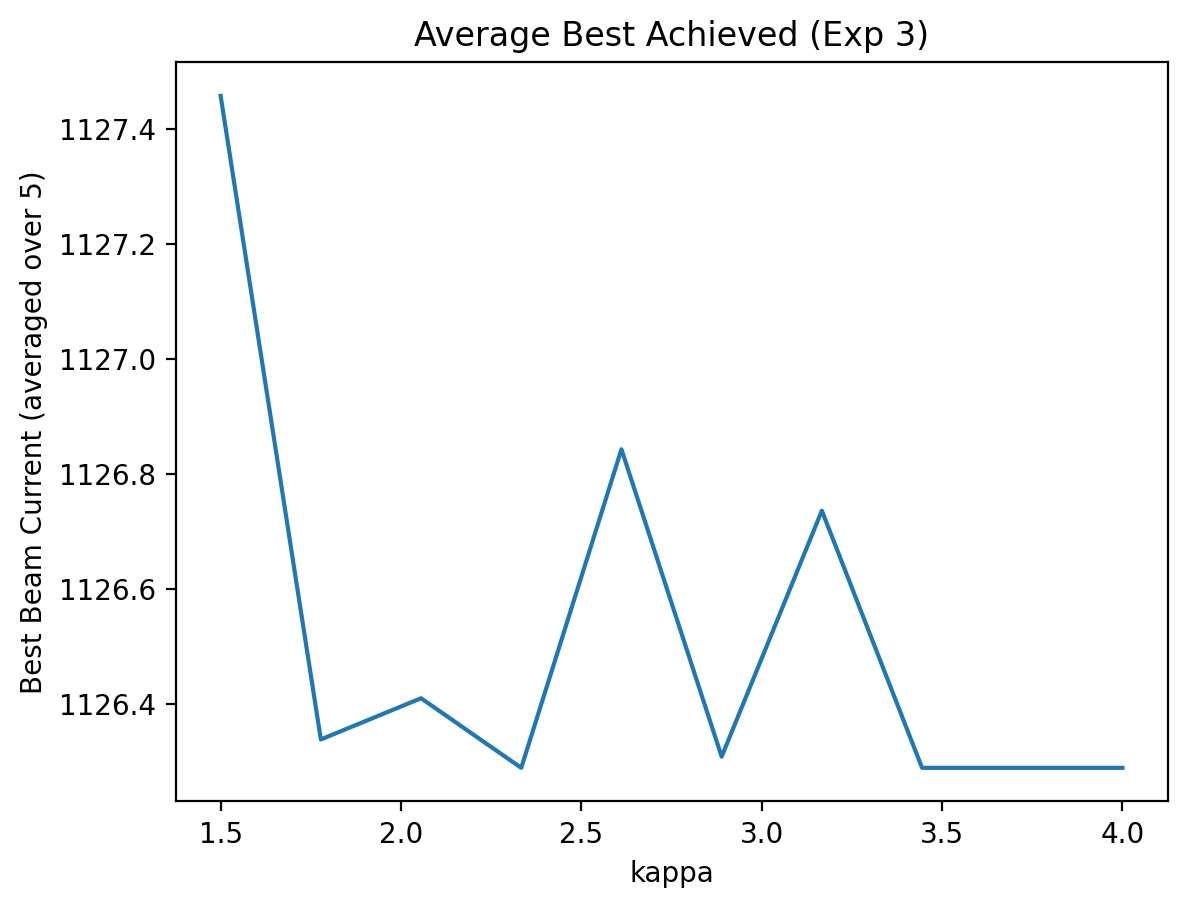

In [14]:


n = 5
kappas = np.linspace(1.5, 4, 10)
results = []
for kappa in tqdm(kappas):
    best_list = try_kappa(kappa, bbf, n=n)
    results.append(sum(best_list)/len(best_list))
    
plt.plot(kappas, results)
plt.title("Average Best Achieved (Exp %s)"%exp_num)
plt.xlabel("kappa")
plt.ylabel("Best Beam Current (averaged over %d)"%n)
plt.show()

In [11]:
bbf(98,98,120)

95.61756601535882

'Cross Sections.gif'